In [1]:
import pandas as pd

In [2]:
caminho_arquivo = 'Data_IGD_VIS.csv'

In [3]:
#decodificando o arquivo
try:
    # Tenta abrir com ',' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ",", encoding='UTF-8')
except pd.errors.ParserError:
    # Se ocorrer um erro, tente abrir com ';' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ";", encoding='UTF8')

In [4]:
pd_igd_vis.head()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
0,120001,ACRELÂNDIA,AC,jul/23,"67,55","94,46","83,01",82
1,120005,ASSIS BRASIL,AC,jul/23,"62,2","74,33","89,93","79,09"
2,120010,BRASILÉIA,AC,jul/23,"55,69","84,09","85,07","77,48"
3,120013,BUJARI,AC,jul/23,"73,72","83,85","92,11","85,44"
4,120017,CAPIXABA,AC,jul/23,"72,2","80,24","88,61","82,41"


In [5]:
pd_igd_vis.info

<bound method DataFrame.info of       Código Unidade Territorial  UF Referência  \
0     120001          ACRELÂNDIA  AC     jul/23   
1     120005        ASSIS BRASIL  AC     jul/23   
2     120010           BRASILÉIA  AC     jul/23   
3     120013              BUJARI  AC     jul/23   
4     120017            CAPIXABA  AC     jul/23   
...      ...                 ...  ..        ...   
5565  172120      TOCANTINÓPOLIS  TO     jul/23   
5566  172125            TUPIRAMA  TO     jul/23   
5567  172130          TUPIRATINS  TO     jul/23   
5568  172208        WANDERLÂNDIA  TO     jul/23   
5569  172210             XAMBIOÁ  TO     jul/23   

     TAFE - Taxa de Acompanhamento de Frequência Escolar  \
0                                                 67,55    
1                                                  62,2    
2                                                 55,69    
3                                                 73,72    
4                                                  72,2

In [6]:
pd_igd_vis.tail()

,Código,Unidade Territorial,UF,Referência,TAFE - Taxa de Acompanhamento de Frequência Escolar,TAAS - Taxa de Acompanhamene Agenda de Saúde,TAC - Taxa de Atualização Cadastral,Fator 1: Operação ( (TAFE+TAAS) / 2 + TAC / 2)
5565,172120,TOCANTINÓPOLIS,TO,jul/23,"88,01","88,8","84,26","86,33"
5566,172125,TUPIRAMA,TO,jul/23,"71,34","89,88","82,82","81,71"
5567,172130,TUPIRATINS,TO,jul/23,"88,62","70,32","67,06","73,26"
5568,172208,WANDERLÂNDIA,TO,jul/23,"69,51","83,78","83,68","80,16"
5569,172210,XAMBIOÁ,TO,jul/23,"69,38","78,64","85,08","79,54"


In [7]:
# removendo colunas que não preciso
remover_colunas = ['TAFE - Taxa de Acompanhamento de Frequência Escolar' , 'TAAS - Taxa de Acompanhamene Agenda de Saúde' , 'TAC - Taxa de Atualização Cadastral']
df_igd = pd_igd_vis.drop(remover_colunas, axis = 1)

In [8]:
#renomeando colunas
df_igd = df_igd.rename(columns={'Código': 'ibge_6', 'Unidade Territorial': 'municipio' , 'Referência' : 'ano_mês' , 'Fator 1: Operação (  (TAFE+TAAS) / 2 +  TAC / 2)': 'igd_m'} )

In [9]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m
0,120001,ACRELÂNDIA,AC,jul/23,82
1,120005,ASSIS BRASIL,AC,jul/23,"79,09"
2,120010,BRASILÉIA,AC,jul/23,"77,48"
3,120013,BUJARI,AC,jul/23,"85,44"
4,120017,CAPIXABA,AC,jul/23,"82,41"
...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,"86,33"
5566,172125,TUPIRAMA,TO,jul/23,"81,71"
5567,172130,TUPIRATINS,TO,jul/23,"73,26"
5568,172208,WANDERLÂNDIA,TO,jul/23,"80,16"


In [10]:
#convertendo a coluna igd_m em numeric
df_igd['igd_m'] = pd.to_numeric(df_igd['igd_m'].str.replace(',', '.', regex=True), errors='coerce')

In [11]:
df_igd

,ibge_6,municipio,UF,ano_mês,igd_m
0,120001,ACRELÂNDIA,AC,jul/23,82.00
1,120005,ASSIS BRASIL,AC,jul/23,79.09
2,120010,BRASILÉIA,AC,jul/23,77.48
3,120013,BUJARI,AC,jul/23,85.44
4,120017,CAPIXABA,AC,jul/23,82.41
...,...,...,...,...,...
5565,172120,TOCANTINÓPOLIS,TO,jul/23,86.33
5566,172125,TUPIRAMA,TO,jul/23,81.71
5567,172130,TUPIRATINS,TO,jul/23,73.26
5568,172208,WANDERLÂNDIA,TO,jul/23,80.16


In [12]:
# Ordenando o DataFrame pelo valor do IGD em ordem crescente
df_igd = df_igd.sort_values(by='igd_m', ascending=False)

# Criar uma nova coluna chamada 'Ranking' com o ranking do IGD-M
df_igd['Ranking'] = df_igd['igd_m'].rank(ascending=False, method='first')

# Exibir o DataFrame
print(df_igd)

      ibge_6             municipio  UF ano_mês  igd_m  Ranking
5210  353770               PIACATU  SP  jul/23  99.20      1.0
4406  432330           VILA FLORES  RS  jul/23  99.13      2.0
4231  431445                PINHAL  RS  jul/23  98.32      3.0
5039  352215                ITAOCA  SP  jul/23  97.92      4.0
3435  411729        NOVO ITACOLOMI  PR  jul/23  97.67      5.0
...      ...                   ...  ..     ...    ...      ...
4581  421110         MONTE CASTELO  SC  jul/23    NaN      NaN
4933  351330              CRUZÁLIA  SP  jul/23    NaN      NaN
5108  352870       MARABÁ PAULISTA  SP  jul/23    NaN      NaN
5258  354210                RAFARD  SP  jul/23    NaN      NaN
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23    NaN      NaN

[5570 rows x 6 columns]


In [13]:
#tranformando os valores nulos em zero
df_igd ['igd_m'] = df_igd ['igd_m']. fillna(0)

In [14]:
df_igd.tail()

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking
4581,421110,MONTE CASTELO,SC,jul/23,0.0,NaN
4933,351330,CRUZÁLIA,SP,jul/23,0.0,NaN
5108,352870,MARABÁ PAULISTA,SP,jul/23,0.0,NaN
5258,354210,RAFARD,SP,jul/23,0.0,NaN
5424,355690,VISTA ALEGRE DO ALTO,SP,jul/23,0.0,NaN


In [15]:
#Vou visualizar novamente meus dados para entender de que forma eu posso agrupá-los
df_igd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 5210 to 5424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5570 non-null   int64  
 1   municipio  5570 non-null   object 
 2   UF         5570 non-null   object 
 3   ano_mês    5570 non-null   object 
 4   igd_m      5570 non-null   float64
 5   Ranking    5543 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 304.6+ KB


In [16]:
# verificando quantas linhas temos com valor zero e quais municípios são
contagem_zeros = (df_igd['igd_m'] == 0).sum()

print("Número de linhas com valor zero na coluna: ", contagem_zeros)

linhas_com_zero = df_igd.loc[df_igd['igd_m'] == 0]

print(linhas_com_zero)

Número de linhas com valor zero na coluna:  27
      ibge_6              municipio  UF ano_mês  igd_m  Ranking
144   130130                CODAJÁS  AM  jul/23    0.0      NaN
154   130200             ITAPIRANGA  AM  jul/23    0.0      NaN
228   290220                ARAMARI  BA  jul/23    0.0      NaN
303   290830   CONCEIÇÃO DO ALMEIDA  BA  jul/23    0.0      NaN
306   290860                  CONDE  BA  jul/23    0.0      NaN
359   291310                IBITITÁ  BA  jul/23    0.0      NaN
423   291860               JUSSIAPE  BA  jul/23    0.0      NaN
574   293030          SERRA DOURADA  BA  jul/23    0.0      NaN
2432  150110                  BAGRE  PA  jul/23    0.0      NaN
2434  150125                BANNACH  PA  jul/23    0.0      NaN
2540  150746      SÃO JOÃO DA PONTA  PA  jul/23    0.0      NaN
3742  240520                JANDUÍS  RN  jul/23    0.0      NaN
3941  430107        ARROIO DO PADRE  RS  jul/23    0.0      NaN
4037  430593          CORONEL PILAR  RS  jul/23    0.0   

In [17]:
#criando um gráfico de barras com os dez munícipios com menor IGD-M

import matplotlib.pyplot as plt

# Ordeando os valores de 'igd_m' em ordem decrescente para os 10 municipios com menor taxa
top_10_municipios_menor = df_igd.sort_values(by='igd_m', ascending=True).head(10)

In [18]:
#nenhum munícipio tem igd_m, então o grafico fica vazio
top_10_municipios_menor

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking
5424,355690,VISTA ALEGRE DO ALTO,SP,jul/23,0.0,NaN
144,130130,CODAJÁS,AM,jul/23,0.0,NaN
154,130200,ITAPIRANGA,AM,jul/23,0.0,NaN
228,290220,ARAMARI,BA,jul/23,0.0,NaN
303,290830,CONCEIÇÃO DO ALMEIDA,BA,jul/23,0.0,NaN
306,290860,CONDE,BA,jul/23,0.0,NaN
359,291310,IBITITÁ,BA,jul/23,0.0,NaN
423,291860,JUSSIAPE,BA,jul/23,0.0,NaN
574,293030,SERRA DOURADA,BA,jul/23,0.0,NaN
2432,150110,BAGRE,PA,jul/23,0.0,NaN


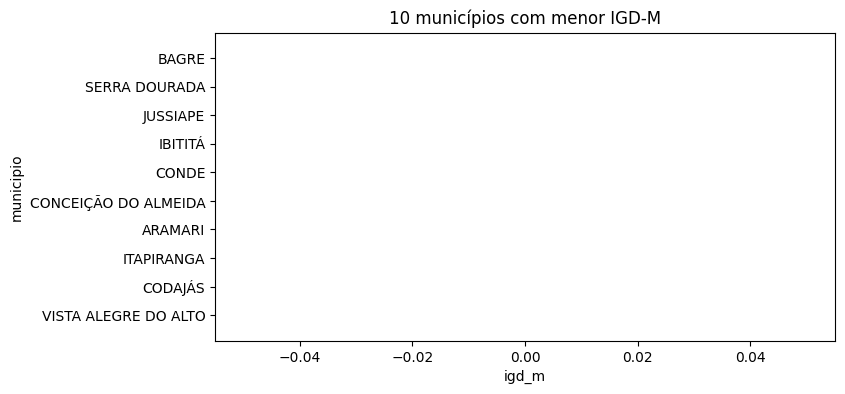

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_menor['municipio'], top_10_municipios_menor['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com menor IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

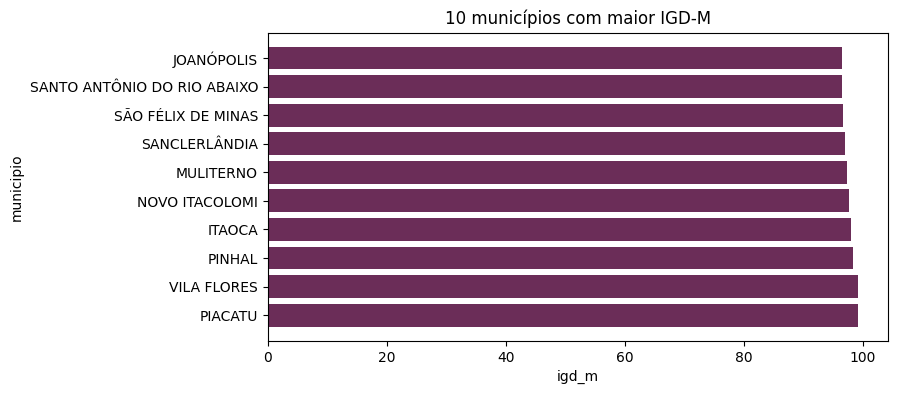

In [20]:
#Agora a mesma coisa para os dez municípios com as maiores taxas de IGD-M
top_10_municipios_maior = df_igd.sort_values(by='igd_m', ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_maior['municipio'], top_10_municipios_maior['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com maior IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

In [21]:
#vamos dividir o dataframe em dez grupos iguais
Q1 = df_igd['igd_m'].quantile(0.1)
Q2 = df_igd['igd_m'].quantile(0.2)
Q3 = df_igd['igd_m'].quantile(0.3)
Q4 = df_igd['igd_m'].quantile(0.4)
Q5 = df_igd['igd_m'].quantile(0.5)  # Mediana (quintil 5)
Q6 = df_igd['igd_m'].quantile(0.6)
Q7 = df_igd['igd_m'].quantile(0.7)
Q8 = df_igd['igd_m'].quantile(0.8)
Q9 = df_igd['igd_m'].quantile(0.9)

print('Primeiro décimo: ', Q1)
print('Segundo décimo: ', Q2)
print('Terceiro décimo: ', Q3)
print('Quarto décimo: ', Q4)
print('Mediana (Quintil 5): ', Q5)
print('Sexto décimo: ', Q6)
print('Sétimo décimo: ', Q7)
print('Oitavo décimo: ', Q8)
print('Nono décimo: ', Q9)

Primeiro décimo:  76.54
Segundo décimo:  79.41
Terceiro décimo:  81.517
Quarto décimo:  83.04
Mediana (Quintil 5):  84.51
Sexto décimo:  85.84
Sétimo décimo:  87.19
Oitavo décimo:  88.67
Nono décimo:  90.491


In [22]:
#nomenado os grupos
df_igd['QuintilRank'] = pd.qcut(
    df_igd['igd_m'],
    q=10,
    labels=[
        "primeiro décimo",
        "segundo décimo",
        "terceiro décimo",
        "quarto décimo",
        "quinto décimo ",
        "sexto décimo",
        "sétimo décimo",
        "oitavo décimo",
        "nono décimo",
        "décimo décimo"
    ])

In [23]:
# verificando quantos municipios ficaram em cada grupo
contagem_quintis = df_igd['QuintilRank'].value_counts()

In [24]:
contagem_quintis

QuintilRank
quarto décimo      560
sétimo décimo      559
primeiro décimo    558
segundo décimo     558
décimo décimo      557
quinto décimo      556
sexto décimo       556
oitavo décimo      556
terceiro décimo    555
nono décimo        555
Name: count, dtype: int64

In [25]:
# criar a média de cada quintil com base no valor de IGD-M
media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()

C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\3499268882.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()


In [26]:
media_quintil

QuintilRank
primeiro décimo    69.413513
segundo décimo     78.106057
terceiro décimo    80.549315
quarto décimo      82.315232
quinto décimo      83.821115
sexto décimo       85.203363
sétimo décimo      86.546726
oitavo décimo      87.901978
nono décimo        89.571387
décimo décimo      92.198312
Name: igd_m, dtype: float64

C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\3495571292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()


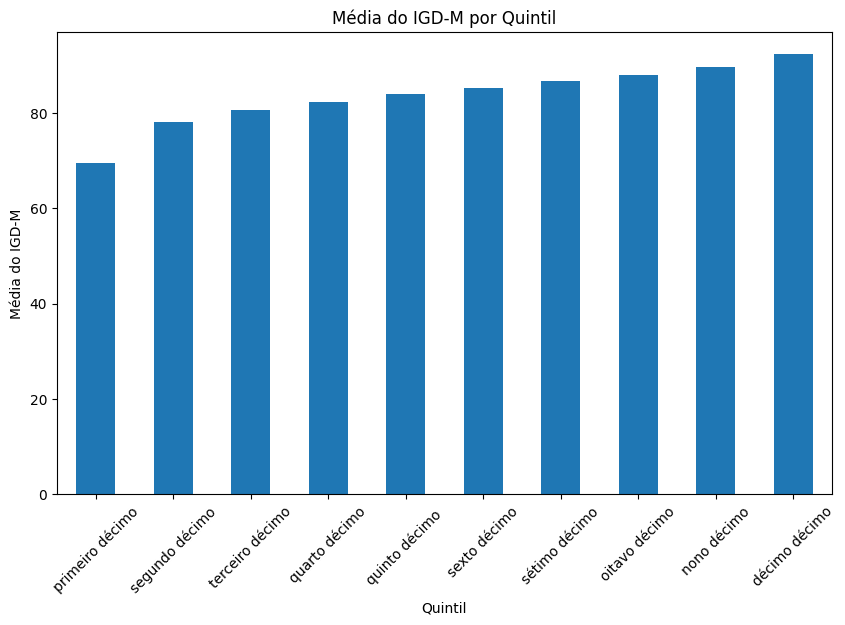

In [27]:
#Agora vou cirar um gráfico de barras com essas médias
media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()

# Plotar o gráfico de barras das médias por quintil
media_quintil.plot(kind='bar', figsize=(10, 6))
plt.title('Média do IGD-M por Quintil')
plt.xlabel('Quintil')
plt.ylabel('Média do IGD-M')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

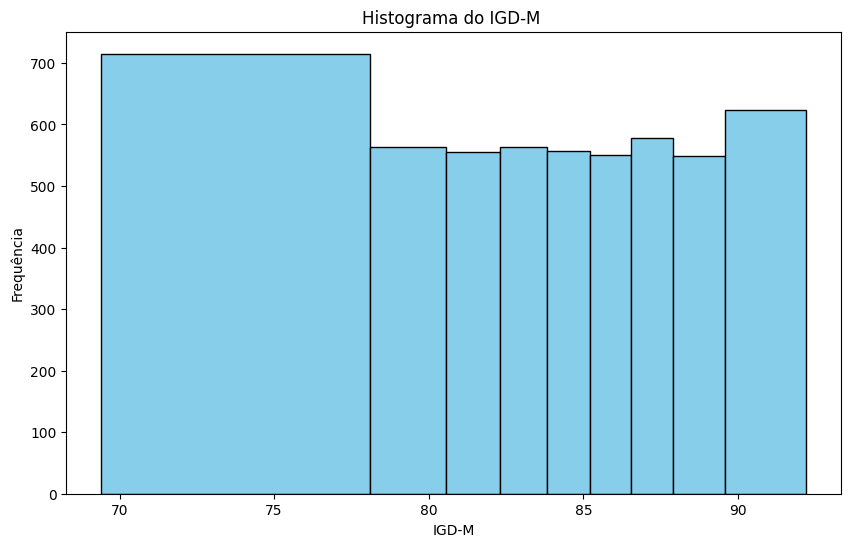

In [28]:
#criando um histograma, com frequencia que os valores aparecem em cada quintil 
dados = df_igd['igd_m']

# Suponha que 'media_quintil' já contenha as médias dos quintis calculadas anteriormente.
# Transforme a série em uma lista de valores.
medias_quintis = media_quintil.values

# Plotar o histograma com as médias dos quintis como bins
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.hist(dados, bins=medias_quintis, color='skyblue', edgecolor='black')
plt.title('Histograma do IGD-M ')
plt.xlabel('IGD-M')
plt.ylabel('Frequência')
plt.show()


C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\675057974.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()


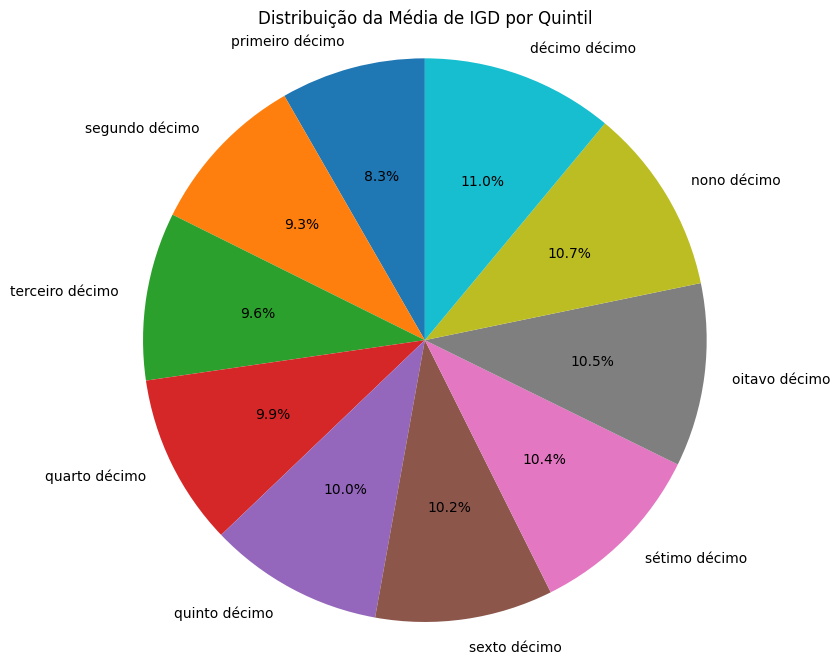

In [29]:
#criando um gráfico de pizza para visualizar a representação da média dos quintis no todo
import matplotlib.pyplot as plt

# Suponha que 'media_quintil' contenha as médias do PIB por quintil
media_quintil = df_igd.groupby('QuintilRank')['igd_m'].mean()

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(media_quintil, labels=media_quintil.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição da Média de IGD por Quintil')
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()

In [30]:
#criando um novo dataframe sem os valores zero, para verificar se há mudança na análise

df_igd_sem_nulo = df_igd.drop(df_igd[df_igd['igd_m'] == 0].index)


In [31]:
df_igd_sem_nulo.tail()

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking,QuintilRank
192,160025,ITAUBAL,AP,jul/23,61.66,5539.0,primeiro décimo
443,292000,MAIQUINIQUE,BA,jul/23,61.54,5540.0,primeiro décimo
3919,430003,ACEGUÁ,RS,jul/23,61.53,5541.0,primeiro décimo
4132,431060,ITAQUI,RS,jul/23,61.10,5542.0,primeiro décimo
4258,431540,REDENTORA,RS,jul/23,58.67,5543.0,primeiro décimo


In [32]:
df_igd_sem_nulo.describe


<bound method NDFrame.describe of       ibge_6       municipio  UF ano_mês  igd_m  Ranking      QuintilRank
5210  353770         PIACATU  SP  jul/23  99.20      1.0    décimo décimo
4406  432330     VILA FLORES  RS  jul/23  99.13      2.0    décimo décimo
4231  431445          PINHAL  RS  jul/23  98.32      3.0    décimo décimo
5039  352215          ITAOCA  SP  jul/23  97.92      4.0    décimo décimo
3435  411729  NOVO ITACOLOMI  PR  jul/23  97.67      5.0    décimo décimo
...      ...             ...  ..     ...    ...      ...              ...
192   160025         ITAUBAL  AP  jul/23  61.66   5539.0  primeiro décimo
443   292000     MAIQUINIQUE  BA  jul/23  61.54   5540.0  primeiro décimo
3919  430003          ACEGUÁ  RS  jul/23  61.53   5541.0  primeiro décimo
4132  431060          ITAQUI  RS  jul/23  61.10   5542.0  primeiro décimo
4258  431540       REDENTORA  RS  jul/23  58.67   5543.0  primeiro décimo

[5543 rows x 7 columns]>

In [33]:
#dividindo em dez grupos dividir em dez grupos
Q1 = df_igd_sem_nulo['igd_m'].quantile(0.1)
Q2 = df_igd_sem_nulo['igd_m'].quantile(0.2)
Q3 = df_igd_sem_nulo['igd_m'].quantile(0.3)
Q4 = df_igd_sem_nulo['igd_m'].quantile(0.4)
Q5 = df_igd_sem_nulo['igd_m'].quantile(0.5)  # Mediana (quintil 5)
Q6 = df_igd_sem_nulo['igd_m'].quantile(0.6)
Q7 = df_igd_sem_nulo['igd_m'].quantile(0.7)
Q8 = df_igd_sem_nulo['igd_m'].quantile(0.8)
Q9 = df_igd_sem_nulo['igd_m'].quantile(0.9)

print('Primeiro décimo: ', Q1)
print('Segundo décimo: ', Q2)
print('Terceiro décimo: ', Q3)
print('Quarto décimo: ', Q4)
print('Mediana (Quintil 5): ', Q5)
print('Sexto décimo: ', Q6)
print('Sétimo décimo: ', Q7)
print('Oitavo décimo: ', Q8)
print('Nono décimo: ', Q9)

Primeiro décimo:  76.71
Segundo décimo:  79.514
Terceiro décimo:  81.56
Quarto décimo:  83.07
Mediana (Quintil 5):  84.54
Sexto décimo:  85.86
Sétimo décimo:  87.21
Oitavo décimo:  88.686
Nono décimo:  90.51


In [34]:
df_igd_sem_nulo['QuintilRank'] = pd.qcut(
    df_igd_sem_nulo['igd_m'],
    q=10,
    labels=[
        "primeiro décimo",
        "segundo décimo",
        "terceiro décimo",
        "quarto décimo",
        "quinto décimo",
        "sexto décimo",
        "sétimo décimo",
        "oitavo décimo",
    
        "nono décimo",
        "décimo décimo"    
    ])

In [35]:
df_igd_sem_nulo

,ibge_6,municipio,UF,ano_mês,igd_m,Ranking,QuintilRank
5210,353770,PIACATU,SP,jul/23,99.20,1.0,décimo décimo
4406,432330,VILA FLORES,RS,jul/23,99.13,2.0,décimo décimo
4231,431445,PINHAL,RS,jul/23,98.32,3.0,décimo décimo
5039,352215,ITAOCA,SP,jul/23,97.92,4.0,décimo décimo
3435,411729,NOVO ITACOLOMI,PR,jul/23,97.67,5.0,décimo décimo
...,...,...,...,...,...,...,...
192,160025,ITAUBAL,AP,jul/23,61.66,5539.0,primeiro décimo
443,292000,MAIQUINIQUE,BA,jul/23,61.54,5540.0,primeiro décimo
3919,430003,ACEGUÁ,RS,jul/23,61.53,5541.0,primeiro décimo
4132,431060,ITAQUI,RS,jul/23,61.10,5542.0,primeiro décimo


In [36]:
contagem_quintis = df_igd_sem_nulo['QuintilRank'].value_counts()
contagem_quintis

QuintilRank
primeiro décimo    558
terceiro décimo    557
sexto décimo       556
nono décimo        556
sétimo décimo      555
quinto décimo      554
décimo décimo      553
quarto décimo      552
segundo décimo     551
oitavo décimo      551
Name: count, dtype: int64

In [37]:
media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()

C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\1862497115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()


In [38]:
media_quintil

QuintilRank
primeiro décimo    73.122168
segundo décimo     78.226987
terceiro décimo    80.627289
quarto décimo      82.365127
quinto décimo      83.855686
sexto décimo       85.231960
sétimo décimo      86.571153
oitavo décimo      87.916316
nono décimo        89.582932
décimo décimo      92.210542
Name: igd_m, dtype: float64

C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\2063332742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()


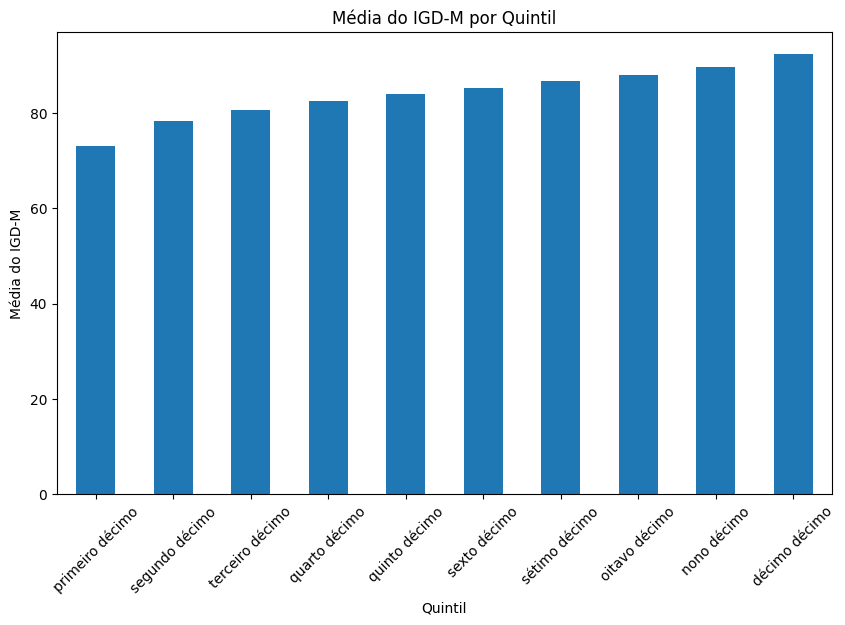

In [39]:
media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()
media_quintil.plot(kind='bar', figsize=(10, 6))
plt.title('Média do IGD-M por Quintil')
plt.xlabel('Quintil')
plt.ylabel('Média do IGD-M')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

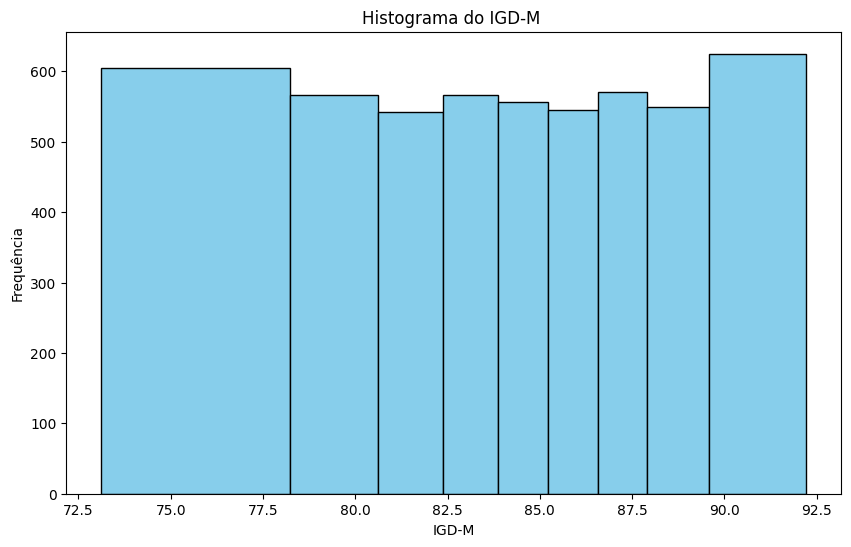

In [40]:
dados = df_igd_sem_nulo['igd_m']

medias_quintis = media_quintil.values


plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.hist(dados, bins=medias_quintis, color='skyblue', edgecolor='black')
plt.title('Histograma do IGD-M ')
plt.xlabel('IGD-M')
plt.ylabel('Frequência')
plt.show()

C:\Users\sesup\AppData\Local\Temp\ipykernel_9472\2663129103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()


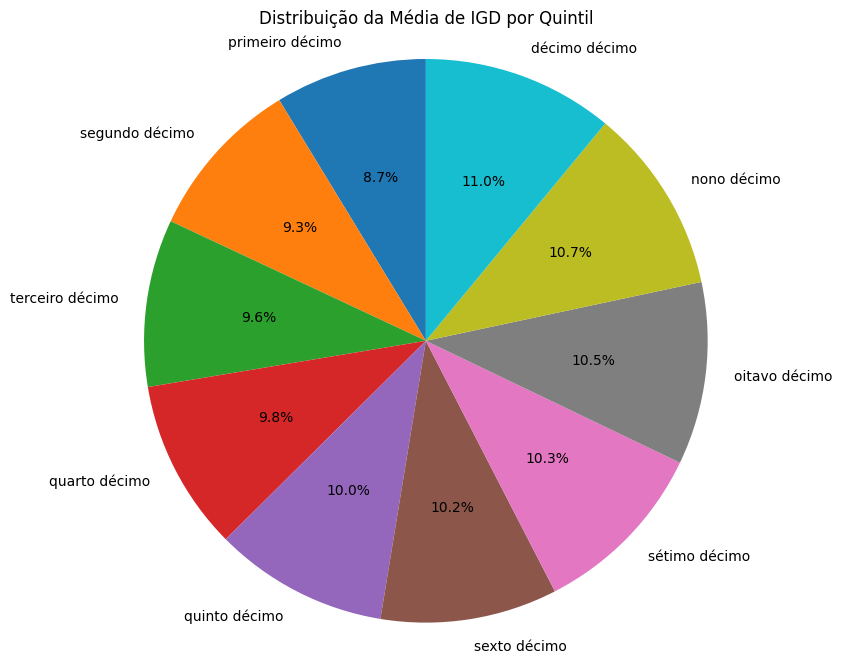

In [41]:
media_quintil = df_igd_sem_nulo.groupby('QuintilRank')['igd_m'].mean()
plt.figure(figsize=(8, 8))
plt.pie(media_quintil, labels=media_quintil.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição da Média de IGD por Quintil')
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()

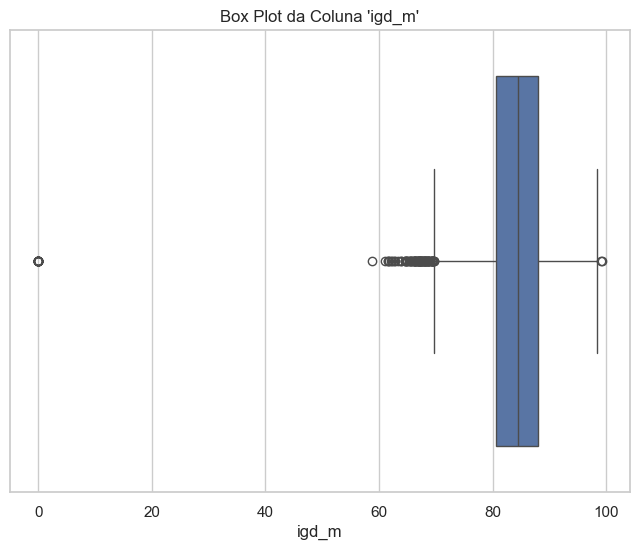

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponhamos que 'df' seja o seu DataFrame e 'coluna' seja a coluna que você deseja plotar.
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Crie o box plot
plt.figure(figsize=(8, 6))  # Ajuste o tamanho do gráfico, se necessário
sns.boxplot(x=df_igd['igd_m'])

# Exiba o gráfico
plt.title("Box Plot da Coluna 'igd_m'")  # Adicione um título ao gráfico
plt.show()

# Suponhamos que 'df' seja o seu DataFrame 